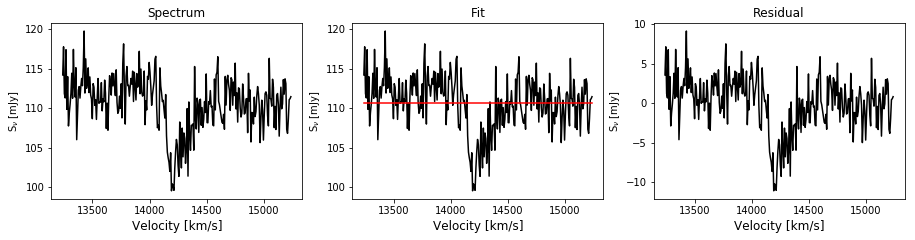

Chi_square(continuum) = 407.878


In [4]:
import numpy as np
import pyspeckit
import pylab as pl
from scipy.optimize import curve_fit
import scipy as sp

dat = np.loadtxt('j1257-1724-Copy1.dat')

velocity = dat[:, 0]
flux = dat[:, 1]
err = dat[:, 2]
h_vel = np.where(velocity >= 15242.8)[0][0]
l_vel = np.where(velocity <= 13242.8)[0][-1]

x, y, err = velocity[l_vel:h_vel], flux[l_vel:h_vel], err[l_vel:h_vel]


def cont(y, c):
    return y*0 + c

def chi_sq(mod, data, err):
    
    return sum(((data - mod)**2)/err**2.)
  
best_val, cov = curve_fit(cont, x, y)

pl.figure()
pl.subplot(331, title = 'Spectrum')
pl.plot(x, y, 'k-')
pl.xlabel('Velocity [km/s]', fontsize = 12)
pl.ylabel('S$_{\\nu}$ [mJy]')

pl.subplot(332, title = 'Fit')
pl.plot(x, y, 'k')
pl.plot(x, cont(x, best_val), 'r-')
pl.xlabel('Velocity [km/s]', fontsize = 12)
pl.ylabel('S$_{\\nu}$ [mJy]')

residual = y - cont(y, best_val)
pl.subplot(333, title = 'Residual')
pl.plot(x, residual, 'k-')

pl.subplots_adjust(right = 2.1, top = 2.2)
pl.xlabel('Velocity [km/s]', fontsize = 12)
pl.ylabel('S$_{\\nu}$ [mJy]')
pl.show()
print('Chi_square(continuum) = %.3f' %chi_sq(cont(x, best_val), y, err))

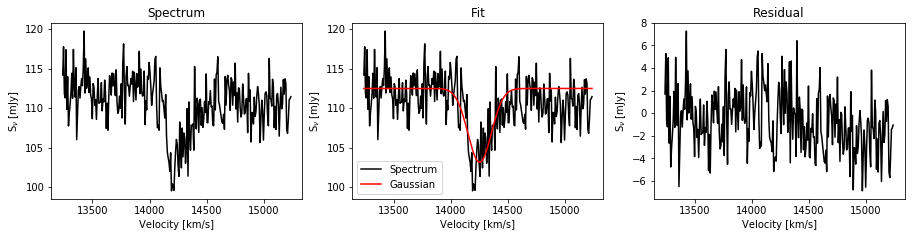

Chi_square(single gaussian) = 254.996


In [5]:
def gauss1(x, a , m , sig):
    
    return -(a)*np.exp((-(x - m)**2)/(2*sig**2)) + 112.5

x, y = velocity[l_vel:h_vel], flux[l_vel:h_vel]

a = np.min(y)
m = x[np.argwhere(y == a)]
init_vals = [112 - a, m[0][0], 5]

popt, cov = curve_fit(gauss1, velocity[l_vel:h_vel], flux[l_vel:h_vel], p0 = init_vals, maxfev = 8000)


pl.subplot(331, title = 'Spectrum')
pl.plot(x, y, 'k-')
pl.xlabel('Velocity [km/s]')
pl.ylabel('S$_{\\nu}$ [mJy]')

pl.subplot(332, title = 'Fit')
pl.plot(velocity[l_vel:h_vel], flux[l_vel:h_vel], 'k', label = 'Spectrum')
pl.plot(velocity[l_vel:h_vel], gauss1(velocity[l_vel:h_vel], *popt) , 'r-', label = 'Gaussian')
pl.xlabel('Velocity [km/s]')
pl.ylabel('S$_{\\nu}$ [mJy]')
pl.legend()

resid = flux[l_vel:h_vel] - (gauss1(velocity[l_vel:h_vel], *popt))
pl.subplot(333, title = 'Residual')
pl.plot(velocity[l_vel:h_vel], resid, 'k-', label = 'Residual')

pl.xlabel('Velocity [km/s]')
pl.ylabel('S$_{\\nu}$ [mJy]')

pl.subplots_adjust(right = 2.1, top = 2.2)
pl.show()
print('Chi_square(single gaussian) = %.3f' %chi_sq(gauss1(x, *popt), y, err))

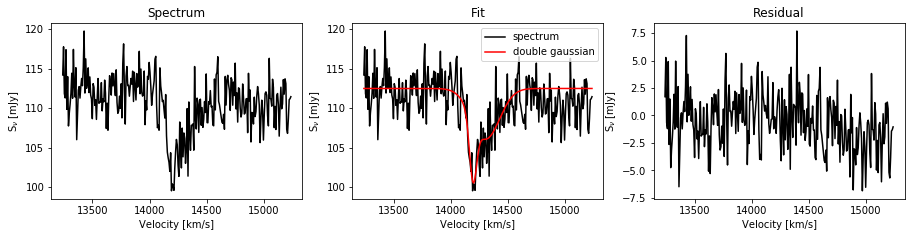

Chi_square(double gaussian) = 233.016
Column density = 4.956e+22 cm^-2


In [10]:
def gauss2(x, a1, m1, sig1, a2, m2, sig2):
    
    return (-(a1)*np.exp((-(x - m1)**2)/(2*sig1**2)) - (a2)*np.exp((-(x - m2)**2)/(2*sig2**2)) + 112.5)

a1 = np.min(y)
#a2 = y[np.argwhere(x >)]
m = x[np.argwhere(y == a)]
init_vals = [112 - a, m[0][0], 5]*2 #, 117.5 - 105.5, 14650, 2.5]

popt, cov = curve_fit(gauss2, x, y, p0 = init_vals)

pl.subplot(331, title = 'Spectrum')
pl.plot(x, y, 'k-')
pl.xlabel('Velocity [km/s]')
pl.ylabel('S$_{\\nu}$ [mJy]')

pl.subplot(332, title = 'Fit')
pl.plot(x, y, 'k-', label = 'spectrum')
pl.plot(x, gauss2(x, *popt), 'r-', label = 'double gaussian')
pl.xlabel('Velocity [km/s]')
pl.ylabel('S$_{\\nu}$ [mJy]')
pl.legend()

resid = y - gauss2(x, *popt)
pl.subplot(333, title = 'Residual')
pl.plot(x, resid, 'k', label = 'residual')
pl.xlabel('Velocity [km/s]')
pl.ylabel('S$_{\\nu}$ [mJy]')

pl.subplots_adjust(right = 2.1, top = 2.2)
pl.show()

print('Chi_square(double gaussian) = %.3f' %chi_sq(gauss2(x, *popt), y, err))
depth = sp.trapz(gauss2(x, *popt)) - 112.5
T_spn = 100

N_HI = 1.823e+18*(T_spn)*(depth/112.5)
print('Column density = %.3e' %N_HI, 'cm^-2' )

In [ ]:
def gauss3(x, a1, m1, sig1, a2, m2, sig2, a3, m3, sig3):
    
    g1 = -(a1)*np.exp((-(x - m1)**2)/(2*sig1**2))
    g2 = - (a2)*np.exp((-(x - m2)**2)/(2*sig2**2))
    g3 = - (a3)*np.exp((-(x - m3)**2)/(2*sig3**2))
    
    return ( g1 + g2 + g3 + 112.5)

a1 = np.min(y)
#a2 = y[np.argwhere(x >)]
m = x[np.argwhere(y == a)]
init_vals = [112 - a, m[0][0], 5]*3# , 7.64, 14393, 2.5, 5.4, 14436, 5]

popt, cov = curve_fit(gauss3, x, y, p0 = init_vals)

pl.subplot(331, title = 'Spectrum')
pl.plot(x, y, 'k-')
pl.xlabel('Velocity [km/s]')
pl.ylabel('S$_{\\nu}$ [mJy]')

pl.subplot(332, title = 'Fit')
pl.plot(x, y, 'k-', label = 'spectrum')
pl.plot(x, gauss3(x, *popt), 'r-', label = 'triple gaussian')
pl.xlabel('Velocity [km/s]')
pl.ylabel('S$_{\\nu}$ [mJy]')
pl.legend()

resid = y - gauss3(x, *popt)
pl.subplot(333, title = 'Residual')
pl.plot(x, resid, 'k', label = 'residual')
pl.xlabel('Velocity [km/s]')
pl.ylabel('S$_{\\nu}$ [mJy]')

pl.subplots_adjust(right = 2.1, top = 2.2)
pl.show()
print('Chi_square(triple gaussian) = %.3f' %chi_sq(gauss3(x, *popt), y, err))
